# Linear Regression

## Create Sample Data

We will first create sample data with known relationships between the input and output

In [1]:
#define toolboxes we need
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define 3 random variable x1, x2, x3
mean = 0
variance = 1
nsamples = 1000

rng = np.random.default_rng(312)

x1 = rng.normal(mean,variance,nsamples)
x2 = rng.normal(mean,variance,nsamples)
x3 = rng.normal(mean,variance,nsamples)

In [3]:
# define ouput as function of input
b1 = 5
b2 = -1
b3 = 3

# add noise
noisevar = .5
noise = rng.normal(mean,noisevar,nsamples)

y = b1*x1 + b2*x2 + b3*x3 + noise

Text(0.5, 0, 'x3')

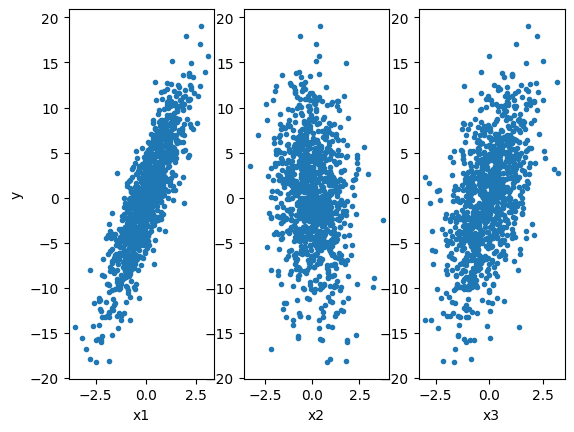

In [4]:
# plot output as a function of all 3 inputs
plt.subplot(1,3,1,)
plt.plot(x1,y,'.')
plt.xlabel("x1")
plt.ylabel("y")

plt.subplot(1,3,2)
plt.plot(x2,y,'.')
plt.xlabel("x2")

plt.subplot(1,3,3)
plt.plot(x3,y,'.')
plt.xlabel("x3")

## Using Ordinary Least Squares

Now we will use our closed-form solution for OLS to solve for the parameters, b1, b2 and b3

In [5]:
# Combine x1, x2 and x3 into a single matrix
X = np.array([x1,x2,x3]).T
print(X.shape)
print(y.shape)

(1000, 3)
(1000,)


In [6]:
#solve for b1, b2 and b3 using matrix formula
b_hat = np.linalg.inv(X.T@X)@(X.T@y)
print(b_hat)

[ 5.00319365 -1.0092205   3.00839884]


## Gradient Descent

Let's try solving for the paramters using gradient descent

First we will use only a single coefficient to make it easier to visualize

In [7]:
# start with an initial guess for b1
b1_guess = rng.normal()

X1 = X[:,0]

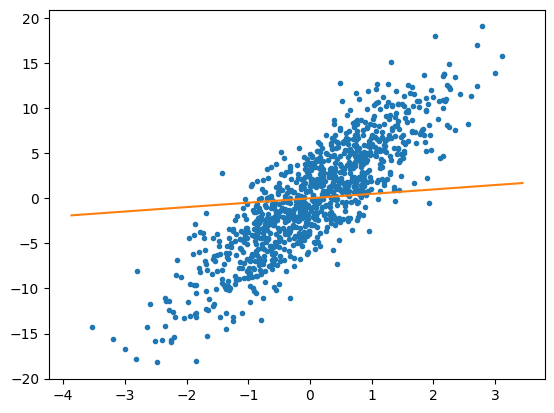

In [8]:
#plot data and our initial guess
plt.plot(x1,y,'.')

#add line with our initial guess
ll , ul = plt.xlim()
plt.plot([ll,ul],[ll*b1_guess, ul*b1_guess])

In [9]:
## use gradient descent to fine tune our guess

#Choose a learning rate
lr = 5e-4

In [10]:
#compute the gradient
gradient = 2*X1.T@X1*b1_guess - 2*X1.T@y
print(gradient)

-9461.126935490658


In [11]:
#create a new guess
b1_guess = b1_guess - lr * gradient

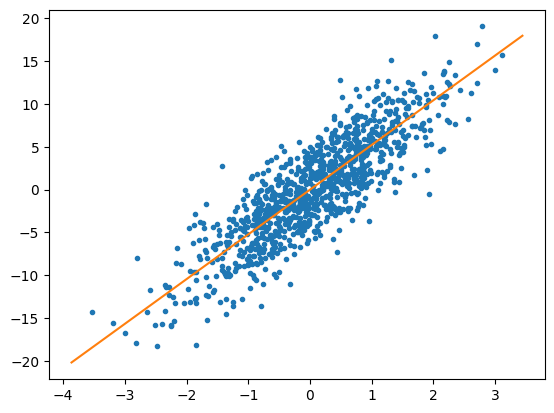

In [12]:
#plot data and our new guess
plt.plot(x1,y,'.')

#add line with our new guess
ll , ul = plt.xlim()
plt.plot([ll,ul],[ll*b1_guess, ul*b1_guess])

In [13]:
print(b1_guess)

5.2202083508170425


## Class Exercise

Write a function that uses gradient descent to get the least-squares paramter estimate

In [21]:
#define 3 random variable x1, x2, x3

# make sure everyone in the class has the same data
rng = np.random.default_rng(312)

mean = 0
variance = 1
nsamples = 1000
nfeatures = 5

X = rng.normal(mean,variance,size=(nsamples,nfeatures))
B = rng.normal(0,3,nfeatures)

# add noise
noisevar = .5
noise = rng.normal(mean,noisevar,nsamples)

y = X @ B + noise

In [ ]:
# Gradient descent function
def gradient_descent(X, y, B_guess, lr=5e-4):
    B_guess = rng.normal()
    gradient = 2*X1.T@X1*b1_guess - 2*X1.T@y
    B_guess = B_guess - lr * gradient


In [ ]:
print(B_guess)

In [ ]:
np.linalg.inv(X.T@X)@(X.T@y)

## Using Scikit-Learn

There is a Python toolbox, Scikit-Learn that contains most of the machine learning algorithms we will use in this course. We don't need to rely on our own code to compute linear regression models (or any other models).

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
# Import linearRegression from Scikit-learn
from sklearn.linear_model import LinearRegression

#Create regression model
regression = LinearRegression()

#Fit regression model
regression.fit(X,y)

#print regression coefficients
print(f"Regression coefficients: {regression.coef_}")


Regression coefficients: [ 5.00413694 -1.00906341  3.00754768]


## Some important usage notes

### Intercepts/biases/offsets
By default Linear Regression assumes your model has an intercept term. This can be accessed or turned off as follows. No need to include a column of 1s in your feature matrix.

In [ ]:
#print intercept from model
print(f"Regression intercept: {regression.intercept_}")


Regression coefficients: -0.01887946776292984


In [17]:
#fit model with no intercept
regressionNoI = LinearRegression(fit_intercept=False)
regressionNoI.fit(X, y)

#print regression coefficients
print('Coefficients: ', *regressionNoI.coef_)
print('Intercept :',  regressionNoI.intercept_)

Coefficients:  5.003193651710955 -1.0092205049049565 3.008398843126067
Intercept : 0.0


### Categorical data
Often times we have data that are non numeric that we would like to fit as part of our model

In [31]:
#define 3 random variable x1, x2, x3

# make sure everyone in the class has the same data
rng = np.random.default_rng(312)

mean = 0
variance = 1
nsamples = 1000
nfeatures = 1 # plus an intercept
ngroups = 3

X = rng.normal(mean,variance,size=(nsamples,nfeatures))
B = rng.normal(0,3,size=(nfeatures+1,ngroups))

print(B)

# add noise
noisevar = .5
noise = rng.normal(mean,noisevar,nsamples*ngroups)

#create output for each group
y = np.zeros((nsamples*ngroups))
G = np.zeros((nsamples*ngroups))

for i in range(ngroups):
    y[i*nsamples:(i+1)*nsamples] = X @ B[1:,i] + B[0,i]
    G[i*nsamples:(i+1)*nsamples] = i

# add noise
noisevar = .5
noise = rng.normal(mean,noisevar,nsamples*ngroups)

y = y + noise

[[ 1.24678727  0.78713847  1.28073846]
 [ 1.60447678 -1.34245688  0.92690919]]


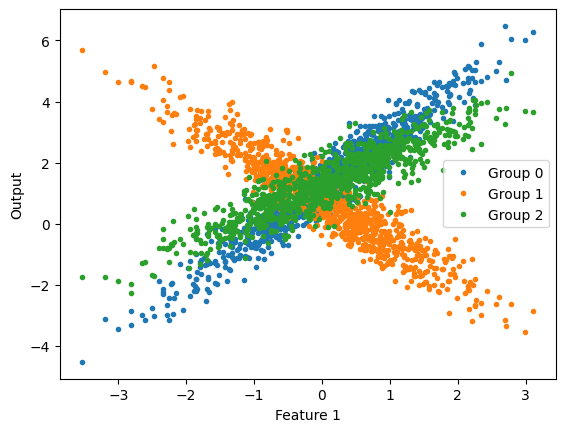

In [32]:
# Plot data
for i in range(3):
    plt.plot(X,y[G==i],'.',label=f'Group {i}')
    
plt.xlabel('Feature 1')
plt.ylabel('Output')
plt.legend()

Don't do this!

In [36]:
#concatenate X and G
XG = np.concatenate([np.tile(X,(3,1)), G.reshape(-1,1)], axis=1)

#print shape of XG
print('Shape XG: ', XG.shape)

#Fit model
regression.fit(XG,y)

#print regression coefficients
print('Coefficients: ', *regression.coef_)
print('Intercept :',  regression.intercept_)

Shape XG:  (3000, 2)
Coefficients:  0.3991209412586452 -0.00730313601501261
Intercept : 1.1147876823696474


G represent a category not a number. LinearRegression assumes everything is a number!

How do we fit data with categorical features?
We encode them!

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

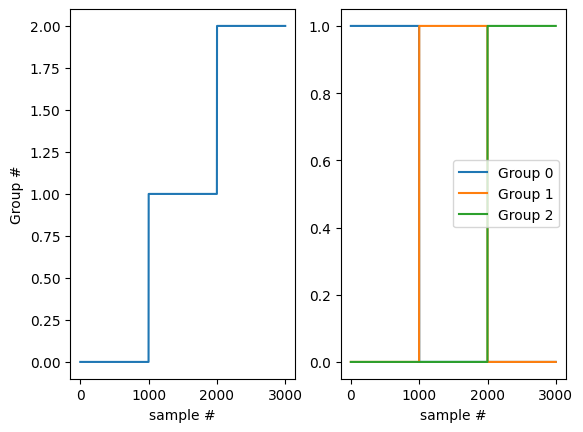

In [38]:
#Import OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

G_encoded = encoder.fit_transform(G.reshape(-1, 1))

plt.subplot(1,2,1)
plt.plot(G)
plt.xlabel('sample #')
plt.ylabel('Group #')

plt.subplot(1,2,2)
plt.plot(G_encoded)
plt.xlabel('sample #')
plt.legend(('Group 0','Group 1','Group 2'))


This is better but still not perfect

In [40]:
XG2 = np.concatenate([np.tile(X, (3,1)), G_encoded], axis=1)

#print shape of XG2
print('Shape XG2: ', XG2.shape)

#fit model
regression.fit(XG2, y)

#print regression coefficients
print('Coefficients: ', *regression.coef_)
print('Intercept :',  regression.intercept_)

Shape XG2:  (3000, 4)
Coefficients:  0.3991209412586452 0.2092744731696364 -0.40394267430924635 0.19466820113961092
Intercept : 1.1074845463546346


Problem with what I have above. There should be 3 slopes and 3 intercepts. Instead I have 4 coefficient estimates and only 1 intercept.

Answer: We must design our feature matrix to have intercepts and slopes for each group.

In [42]:
XG3 = np.concatenate([G_encoded, np.tile(X, (3,1))*G_encoded], axis=1)

#print shape of XG3
print('Shape XG3: ', XG3.shape)

#fit regression model
regression.fit(XG3, y)

#print regression coefficients
print('Coefficients: ', *regression.coef_)
print('Intercept :',  regression.intercept_)



Shape XG3:  (3000, 6)
Coefficients:  0.14958649765261595 -0.3166891275827279 0.16710262993011296 1.5878150809880727 -1.3385452932887831 0.9480930360766616
Intercept : 1.1074845463546343


Uh oh! Now we have 6 coefficients and 1 intercept. We have overfit the model!
Since we have defined the intercept for each group in our input/coefficients. We don't want to have the model fit an intercept as well.

In [44]:
#fit regression model
regressionNoI.fit(XG3, y)

#print regression coefficients
print('Coefficients: ', *regressionNoI.coef_)
print('Intercept :',  regressionNoI.intercept_)

print(B)

Coefficients:  1.257071044007252 0.7907954187719057 1.2745871762847476 1.5878150809880474 -1.3385452932887856 0.9480930360766604
Intercept : 0.0
[[ 1.24678727  0.78713847  1.28073846]
 [ 1.60447678 -1.34245688  0.92690919]]
